In [1]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import nltk
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt

from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px  

from dash import dash_table

app = JupyterDash(__name__)

[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10054] An existing connection was forcibly closed by
[nltk_data]     the remote host>


In [2]:
df = pd.read_csv('Sentiment & Engagement Datasets/ready_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7761 entries, 0 to 7760
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   text                    7760 non-null   object 
 1   title                   7761 non-null   object 
 2   author                  7761 non-null   object 
 3   num_comments            7761 non-null   int64  
 4   post_id                 7761 non-null   object 
 5   upvote_ratio            7761 non-null   float64
 6   score                   7761 non-null   int64  
 7   url                     7761 non-null   object 
 8   subreddit               7761 non-null   object 
 9   link_flair_text         7761 non-null   object 
 10  link_flair_template_id  7761 non-null   object 
 11  created_datetime        7761 non-null   object 
 12  day_of_week             7761 non-null   object 
 13  hour_of_day             7761 non-null   int64  
 14  month                   7761 non-null   

In [4]:
# remove rows where the text column is not a string
df = df[df['text'].apply(lambda x: isinstance(x, str))]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7760 entries, 0 to 7760
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   text                    7760 non-null   object 
 1   title                   7760 non-null   object 
 2   author                  7760 non-null   object 
 3   num_comments            7760 non-null   int64  
 4   post_id                 7760 non-null   object 
 5   upvote_ratio            7760 non-null   float64
 6   score                   7760 non-null   int64  
 7   url                     7760 non-null   object 
 8   subreddit               7760 non-null   object 
 9   link_flair_text         7760 non-null   object 
 10  link_flair_template_id  7760 non-null   object 
 11  created_datetime        7760 non-null   object 
 12  day_of_week             7760 non-null   object 
 13  hour_of_day             7760 non-null   int64  
 14  month                   7760 non-null   objec

In [7]:

sia = SentimentIntensityAnalyzer()

# function to get sentiment
def get_vader_sentiment(text):
    return sia.polarity_scores(text)['compound']  # returns the compound score

df['sentiment_score'] = df['text'].apply(get_vader_sentiment)




In [8]:
df.head(2)

,text,title,author,num_comments,post_id,upvote_ratio,score,url,subreddit,link_flair_text,link_flair_template_id,created_datetime,day_of_week,hour_of_day,month,year,sentiment_score
0,Hi context year old guy Amsterdam currently em...,Lazy job or Hard job?,Weak_Assumption_6889,8,1bfpxll,0.33,0,https://www.reddit.com/r/careeradvice/comments...,careeradvice,Unknown,Unknown,2024-03-15 22:07:22,Friday,22,March,2024,0.7579
1,Looking new role havenut much traction Recentl...,Roast my Resume Pls,Neither_Trash,1,1bh8md2,0.99,1,https://i.redd.it/n918fjprlyoc1.jpeg,resumes,Review my resume • I'm in North America,c292b8e0-28b9-11ec-874c-325b17e851a3,2024-03-17 21:05:40,Sunday,21,March,2024,0.6369


In [9]:
df.to_csv('Sentiment & Engagement Datasets/ready_data_score.csv', index=False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7760 entries, 0 to 7760
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   text                    7760 non-null   object 
 1   title                   7760 non-null   object 
 2   author                  7760 non-null   object 
 3   num_comments            7760 non-null   int64  
 4   post_id                 7760 non-null   object 
 5   upvote_ratio            7760 non-null   float64
 6   score                   7760 non-null   int64  
 7   url                     7760 non-null   object 
 8   subreddit               7760 non-null   object 
 9   link_flair_text         7760 non-null   object 
 10  link_flair_template_id  7760 non-null   object 
 11  created_datetime        7760 non-null   object 
 12  day_of_week             7760 non-null   object 
 13  hour_of_day             7760 non-null   int64  
 14  month                   7760 non-null   objec

 Now that I've successfully added sentiment scores to my dataset

### Analyze Sentiment Scores

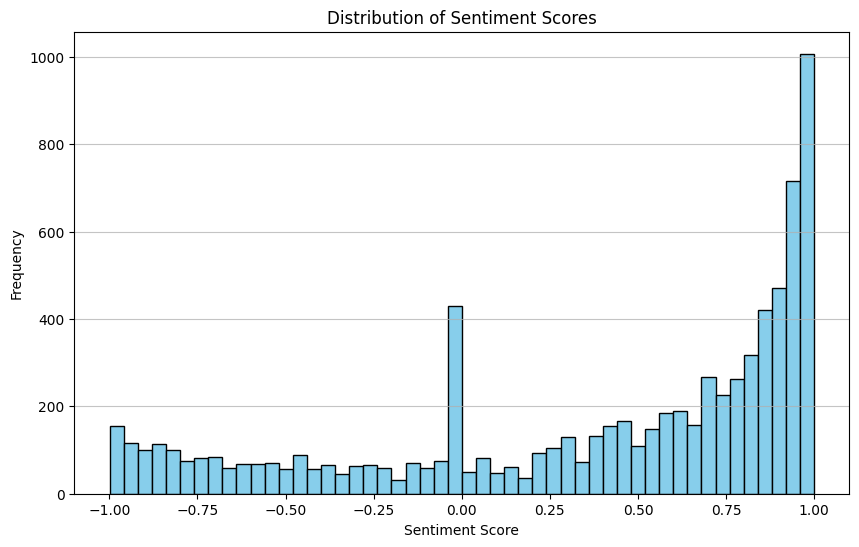

In [9]:
## Overall Sentiment Distribution

# Plotting the histogram of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_score'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


### Sentiment Score Distribution by Time

features including: day_of_week, hour_of_day, month, year,     sentiment_score 